In [ ]:


'''
row_id - A unique identifier for the row.
time_id - The ID code for the time the data was gathered. The time IDs are in order, but the real time between the time IDs is not constant and will likely be shorter for the final private test set than in the training set.
investment_id - The ID code for an investment. Not all investment have data in all time IDs.
target - The target.
[f_0:f_299] - Anonymized features generated from market data.
'''

In [2]:
!pip install pandas==1.2.1
!pip install pandas_profiling==2.8.0

     |████████████████████████████████| 9.9 MB 9.8 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.


In [2]:
# 데이터 불러오기
import pandas as pd
from pandas_profiling import ProfileReport
import datetime
CSV_PATH_1 = '/content/drive/MyDrive/dataset/airplane/Data_Train.csv'
CSV_PATH_2 = '/content/drive/MyDrive/dataset/airplane/Test_set.csv'
CSV_PATH_3 = '/content/drive/MyDrive/dataset/airplane/Sample_submission.csv'
target = 'Price'

In [3]:
import re

# feature 수 10개.
df_train = pd.read_csv(CSV_PATH_1)
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]
X_test = pd.read_csv(CSV_PATH_2)
y_test = pd.read_csv(CSV_PATH_3)
"""
전처리
1. Airline : one-hot encoding
2. Date_of_Journey : 삭제
3. Source : one-hot encoding
4. Destination : one-hot encoding
5. Route : 삭제하자
6. Dep_Time : h*60 + min 으로 치환
7. Arrival_Time : 위와 동
8. Duration : 위와동
9. Total_Stops : 숫자만 남기자 non-stop은 0
10. Additional_Info : one-hot encoding
"""

# Route  Date_of_journey 삭제
X_train=X_train.drop(['Date_of_Journey'], axis=1)
X_test=X_test.drop(['Date_of_Journey'], axis=1)
X_train=X_train.drop(['Route'], axis=1)
X_test=X_test.drop(['Route'], axis=1)

# 탑승, 도착 시간계산
def hour_cal(a):
    hour = int( re.findall(r'(\d+):', a)[0] )
    minute = int( re.findall(r':(\d+)', a)[0] )
    return hour*60+minute
X_train['Dep_Time']=X_train['Dep_Time'].apply(hour_cal)
X_test['Dep_Time']=X_test['Dep_Time'].apply(hour_cal)
X_train['Arrival_Time']=X_train['Arrival_Time'].apply(hour_cal)
X_test['Arrival_Time']=X_test['Arrival_Time'].apply(hour_cal)

# 소요시간 계산
def hour_cal2(a):
    try:
        hour = int( re.findall(r'(\d+)h', a)[0] )
    except:
        hour=0
    try:
        minute = int( re.findall(r'(\d+)m', a)[0] )
    except:
        minute = 0
    return hour*60+minute
X_train['Duration']=X_train['Duration'].apply(hour_cal2)
X_test['Duration']=X_test['Duration'].apply(hour_cal2)

# stop에서 숫자만 남기자
X_train['Total_Stops']=X_train['Total_Stops'].apply(lambda x: 0 if str(x)[0]=='n' else int(str(x)[0]))
X_test['Total_Stops']=X_train['Total_Stops'].apply(lambda x: 0 if str(x)[0]=='n' else int(str(x)[0]))
print(X_train.info())

X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Dep_Time         10683 non-null  int64 
 4   Arrival_Time     10683 non-null  int64 
 5   Duration         10683 non-null  int64 
 6   Total_Stops      10683 non-null  int64 
 7   Additional_Info  10683 non-null  object
dtypes: int64(4), object(4)
memory usage: 667.8+ KB
None


,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,1340,70,170,0,No info
1,Air India,Kolkata,Banglore,350,795,445,2,No info
2,Jet Airways,Delhi,Cochin,565,265,1140,2,No info
3,IndiGo,Kolkata,Banglore,1085,1410,325,1,No info
4,IndiGo,Banglore,New Delhi,1010,1295,285,1,No info


In [5]:
df_train = X_train
df_train['price'] = y_train
df_train.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [7]:
# 원핫 인코딩

#X_train=pd.get_dummies(data = X_train, columns = ['Airline', 'Source', 'Destination', 'Total_Stops',  'Additional_Info'])
#X_test=pd.get_dummies(data = X_test, columns = ['Airline', 'Source', 'Destination', 'Total_Stops',  'Additional_Info'])


temp = pd.concat([X_train, X_test])
temp = pd.get_dummies(data = temp, columns = ['Airline', 'Source', 'Destination', 'Total_Stops',  'Additional_Info'])
X_train_encoded = temp[0:len(X_train)]
X_test_encoded = temp[len(X_train):]

print(X_train_encoded.info())
print(X_test_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10682
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Dep_Time                                      10683 non-null  int64  
 1   Arrival_Time                                  10683 non-null  int64  
 2   Duration                                      10683 non-null  int64  
 3   price                                         10683 non-null  float64
 4   Airline_Air Asia                              10683 non-null  uint8  
 5   Airline_Air India                             10683 non-null  uint8  
 6   Airline_GoAir                                 10683 non-null  uint8  
 7   Airline_IndiGo                                10683 non-null  uint8  
 8   Airline_Jet Airways                           10683 non-null  uint8  
 9   Airline_Jet Airways Business                  10683 non-null 

In [33]:
from sklearn.feature_selection import chi2, SelectKBest
selector1 = SelectKBest(chi2, k=5)
X_train1 = selector1.fit_transform(X_train_encoded, y_train)
columns = X_train_encoded.columns
X_train_encoded = X_train_encoded[columns[selector1.get_support()]]
X_test_encoded = X_test_encoded[columns[selector1.get_support()]]

ValueError: ignored

In [38]:
from sklearn.preprocessing import StandardScaler
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_train_scaled=pd.DataFrame(data=X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test_encoded)
X_test_scaled=pd.DataFrame(data=X_test_scaled)

In [44]:
# modeling MLP 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=4, kernel_initializer='he_normal'))
model.add(Dense(128, activation='tanh', kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l1(0),   
                activity_regularizer=regularizers.l2(0))
         )
Dropout(0.3)
model.add(Dense(128, activation='sigmoid', kernel_initializer='he_normal'))
Dropout(0.5)
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

# model fit
history = model.fit(X_train_scaled, y_train, batch_size = 256, validation_split=0.2, epochs=4000, verbose=0)

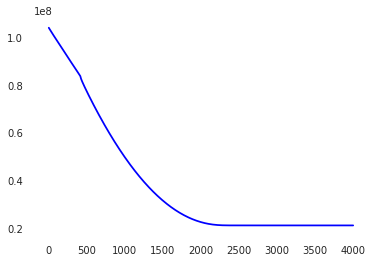

In [59]:
import matplotlib.pyplot as plt
val_loss = history.history['val_loss']
val_mae = history.history['val_mae']
epochs = range(1, len(val_loss) + 1)


plt.plot(epochs, val_loss, 'b', label='val loss')

plt.show()

In [62]:
model.predict(X_test_encoded[0:10])

array([[9079.562],
       [9079.562],
       [9079.562],
       [9079.562],
       [9079.562],
       [9079.562],
       [9079.562],
       [9079.562],
       [9079.562],
       [9079.562]], dtype=float32)